In [1]:
import cv2
import os
import numpy as np
from matplotlib import pyplot as plt

# Opencv中的morphological transformations

OpenCV中的形态转换包括腐蚀（Erosion）、膨胀（Dilation）、Opening、Closing、Morphological Gradient、Top Hat和Black Hat、以及结构化元素（Structuring Element）的使用。这些操作主要用于对图像去除噪声、分离物体、提取轮廓等

## 腐蚀
腐蚀前景物体（标识为白色）的边界。kernel以2D卷积遍历图像。原图像中，只有在kernel中所有像素都为1的情况下，其像素为1，否则为0。即，前景物体里的临近边界的像素都被抛弃了。这可以帮助移除白色噪声、分离两个相邻的物体。

In [2]:
# 读取图像并转换为灰度图像
image = cv2.imread('./dataset/001-22.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
img_h,img_w = gray.shape

# 显示测试图像
scale = 0.4
cv2.namedWindow('image', cv2.WINDOW_NORMAL) 
cv2.resizeWindow('image', width=int(img_w*scale), height=int(img_h*scale))
cv2.imshow('image',gray)
cv2.waitKey(0)
cv2.destroyAllWindows()

漫画分镜过程中，我们对漫画的黑色边框感兴趣，因而应该利用(`cv2.THRESH_BINARY_INV`)将灰度值接近0的像素点设为255

与之相对的，在识别对话框时，我们对漫画的白色背景可能更感兴趣，因而可以使用（`cv2.THRESH_BINARY`）将灰度值接近255的像素点设为255

In [41]:
# 应用阈值处理得到二值图像
# 检测对象为白色，背景为黑色
_, binary = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY_INV)

scale = 0.4
cv2.namedWindow('filtered_image', cv2.WINDOW_NORMAL) 
cv2.resizeWindow('filtered_image', width=int(img_w*scale), height=int(img_w*scale))
cv2.imshow('filtered_image',binary)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [42]:
# 腐蚀边缘
kernel_5 = np.ones((5,5), np.uint8)
erosion_5 = cv2.erode(binary, kernel_5, iterations=1) # 侵蚀次数为1

kernel_3 = np.ones((3,3), np.uint8)
erosion_3 = cv2.erode(binary, kernel_3, iterations=1) # 侵蚀次数为1

erosion_6 = cv2.erode(binary, kernel_3, iterations=2) # 侵蚀次数为2

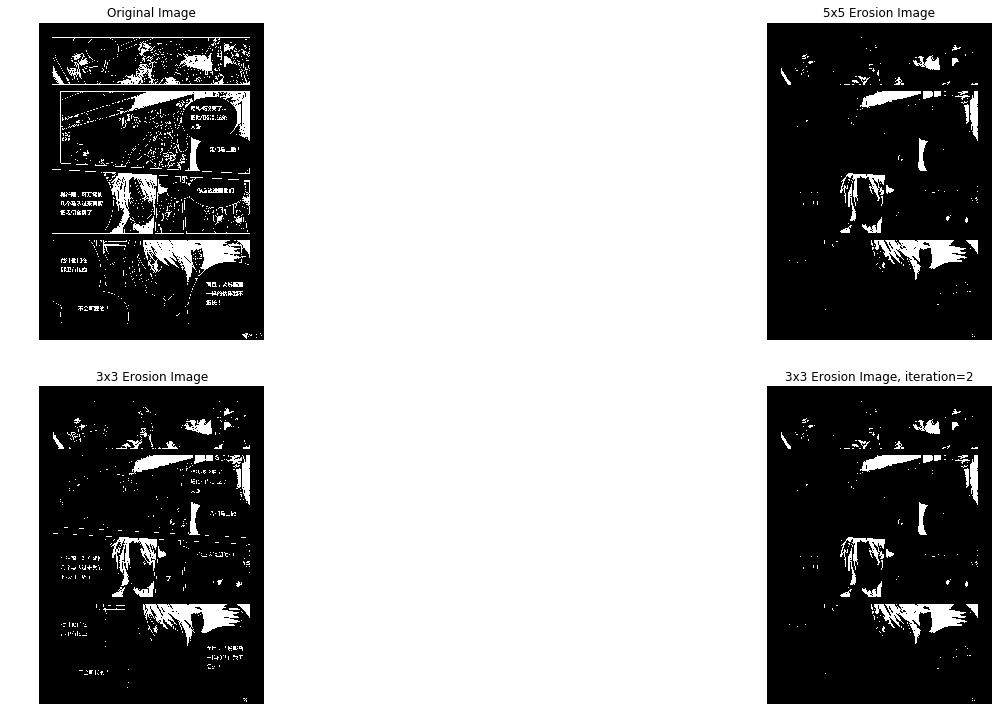

In [43]:
# 设置matplotlib中图像的大小
fig, axs = plt.subplots(2, 2, figsize=(20, 10), constrained_layout=True)
 
# 显示原图
axs[0,0].imshow(binary, cmap='gray')
axs[0,0].set_title('Original Image')
axs[0,0].axis('off')  # 不显示坐标轴
 
# 显示kernel_5
axs[0,1].imshow(erosion_5, cmap='gray')
axs[0,1].set_title('5x5 Erosion Image')
axs[0,1].axis('off')  # 不显示坐标轴

# 显示kernel_3
axs[1,0].imshow(erosion_3, cmap='gray')
axs[1,0].set_title('3x3 Erosion Image')
axs[1,0].axis('off')  # 不显示坐标轴

# 显示kernel_3
axs[1,1].imshow(erosion_6, cmap='gray')
axs[1,1].set_title('3x3 Erosion Image, iteration=2')
axs[1,1].axis('off')  # 不显示坐标轴

plt.show()

腐蚀操作可以有效地将细的白色边框去除掉，即消除漫画中的所有黑色边框

## 膨胀
在kernel里的像素有一个为1则整个kernel里的像素都设为1，全部为0才为0。在噪音移除时，可以先通过erosion移除噪音，再通过dilation来补足缺失的边界。

In [44]:
# 膨胀边缘
erosion_5 = cv2.dilate(binary, kernel_5, iterations=1) # 膨胀次数为1

erosion_3 = cv2.dilate(binary, kernel_3, iterations=1) # 膨胀次数为1

erosion_6 = cv2.dilate(binary, kernel_3, iterations=2) # 膨胀次数为2

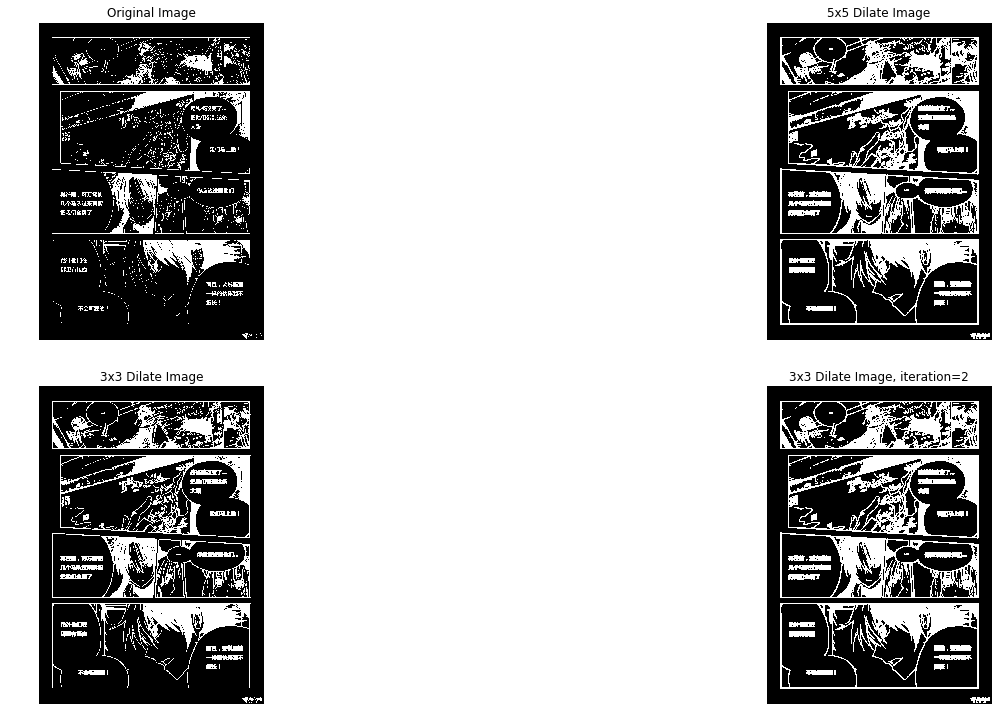

In [45]:
# 设置matplotlib中图像的大小
fig, axs = plt.subplots(2, 2, figsize=(20, 10), constrained_layout=True)
 
# 显示原图
axs[0,0].imshow(binary, cmap='gray')
axs[0,0].set_title('Original Image')
axs[0,0].axis('off')  # 不显示坐标轴
 
# 显示kernel_5
axs[0,1].imshow(erosion_5, cmap='gray')
axs[0,1].set_title('5x5 Dilate Image')
axs[0,1].axis('off')  # 不显示坐标轴

# 显示kernel_3
axs[1,0].imshow(erosion_3, cmap='gray')
axs[1,0].set_title('3x3 Dilate Image')
axs[1,0].axis('off')  # 不显示坐标轴

# 显示kernel_3
axs[1,1].imshow(erosion_6, cmap='gray')
axs[1,1].set_title('3x3 Dilate Image, iteration=2')
axs[1,1].axis('off')  # 不显示坐标轴

plt.show()

膨胀操作可以有效地将边框的白边加粗，在增加边框可识别性的同时，有可能导致紧挨的两个分镜被识别一个。

## Opening
先erosion再dilation，用于处理图像中的一些白色小噪音。侵蚀后其所在部分全为黑(0)，在膨胀时，此处不再表现为白色噪点。而对于大块的白色区域，侵蚀后所在部分部分为白(1)，在膨胀时，所在区域再次变为白色。

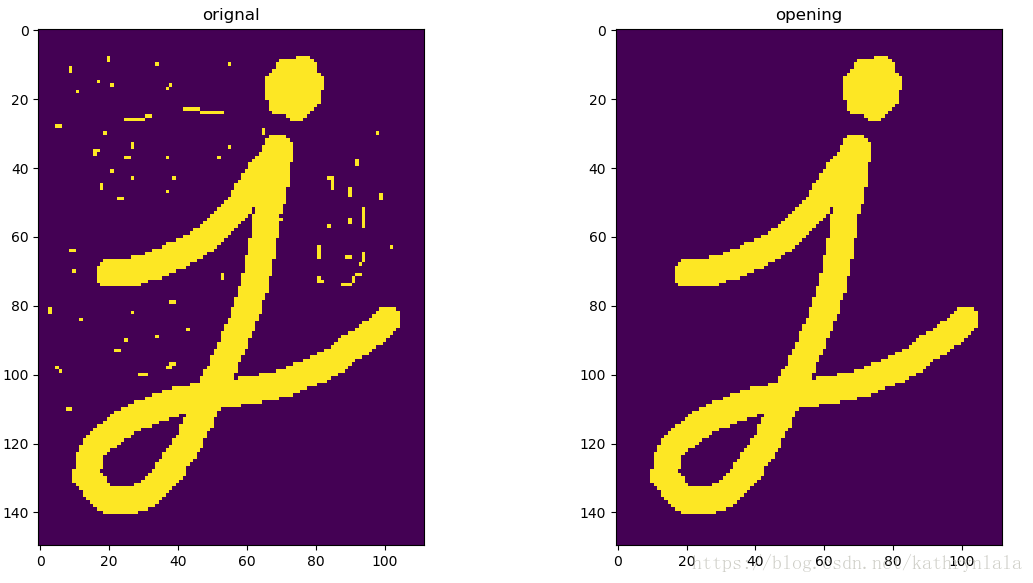

In [46]:
# Opening
erosion_3 = cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel_3)

erosion_5 = cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel_5)

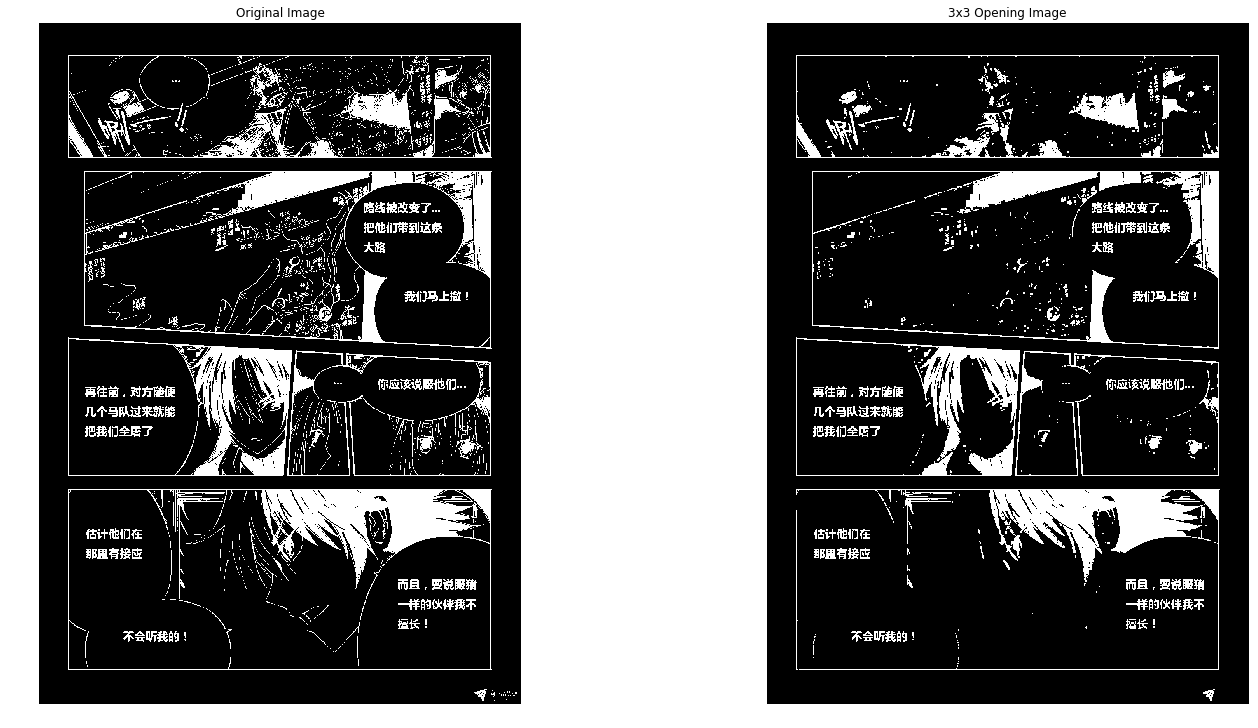

In [47]:
# 设置matplotlib中图像的大小
fig, axs = plt.subplots(1, 2, figsize=(20, 10), constrained_layout=True)
 
# 显示原图
axs[0].imshow(binary, cmap='gray')
axs[0].set_title('Original Image')
axs[0].axis('off')  # 不显示坐标轴
 
# 显示kernel_5
axs[1].imshow(erosion_3, cmap='gray')
axs[1].set_title('3x3 Opening Image')
axs[1].axis('off')  # 不显示坐标轴

plt.show()

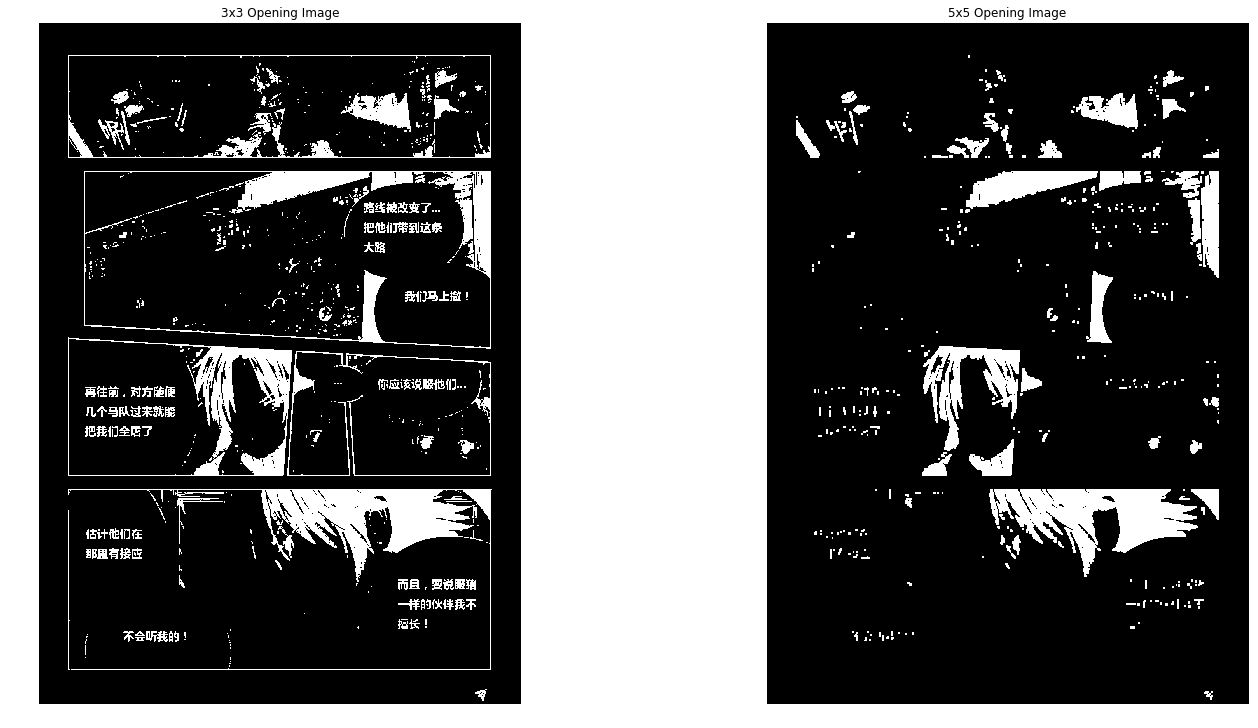

In [48]:
# 设置matplotlib中图像的大小
fig, axs = plt.subplots(1, 2, figsize=(20, 10), constrained_layout=True)
 
axs[0].imshow(erosion_3, cmap='gray')
axs[0].set_title('3x3 Opening Image')
axs[0].axis('off')  # 不显示坐标轴
 
# 显示kernel_5
axs[1].imshow(erosion_5, cmap='gray')
axs[1].set_title('5x5 Opening Image')
axs[1].axis('off')  # 不显示坐标轴

plt.show()

当对话框的边框与分镜边框重合时，opening操作中kernel越大，其对漫画的分镜边框影响越大。此操作将保留大片的白色区域，可以以此有效地将对话框描绘出来。

## Closing
先dilation（膨胀），再erosion（侵蚀）。适合用来处理前景物体内有小黑点的情况。

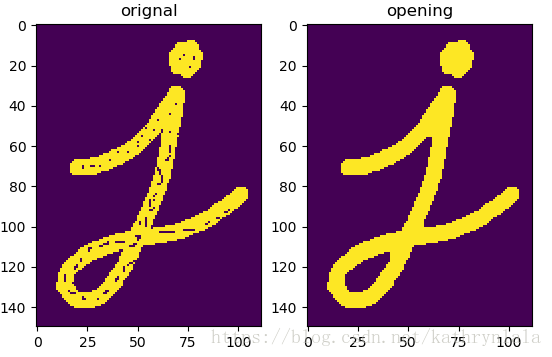

In [49]:
# Closing
erosion_3 = cv2.morphologyEx(binary, cv2.MORPH_CLOSE, kernel_3)

erosion_5 = cv2.morphologyEx(binary, cv2.MORPH_CLOSE, kernel_5)

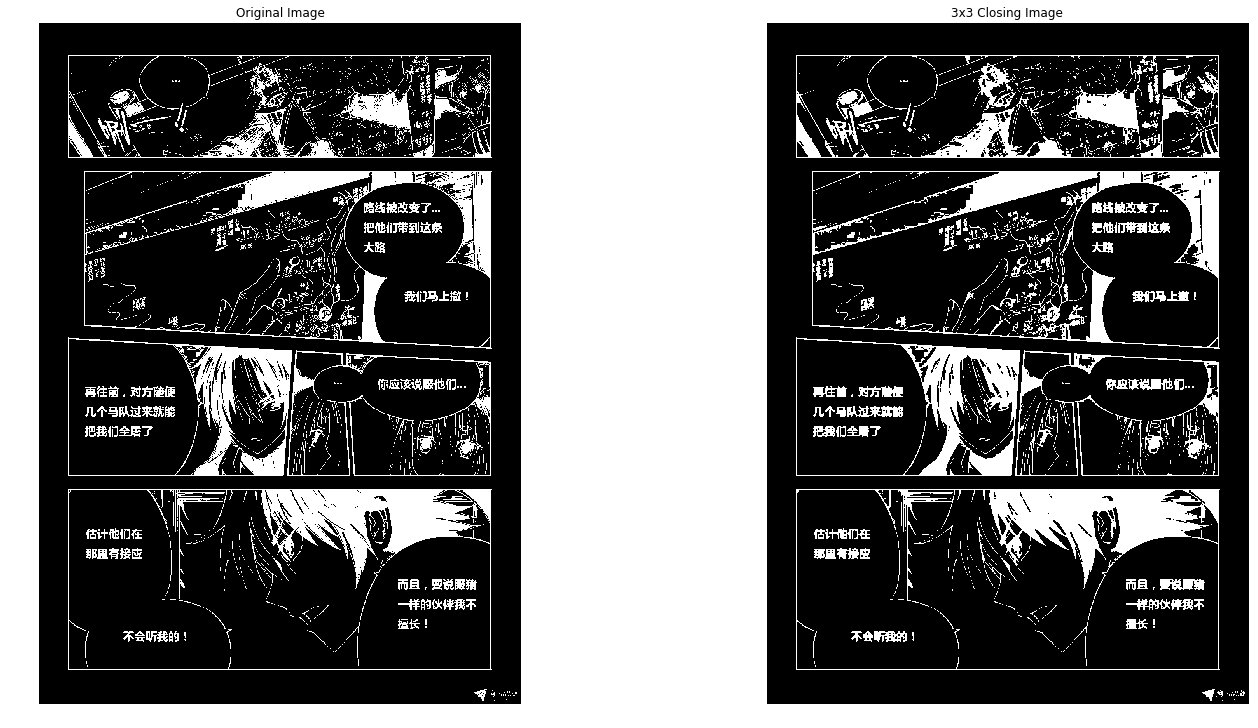

In [50]:
# 设置matplotlib中图像的大小
fig, axs = plt.subplots(1, 2, figsize=(20, 10), constrained_layout=True)
 
# 显示原图
axs[0].imshow(binary, cmap='gray')
axs[0].set_title('Original Image')
axs[0].axis('off')  # 不显示坐标轴
 
# 显示kernel_3
axs[1].imshow(erosion_3, cmap='gray')
axs[1].set_title('3x3 Closing Image')
axs[1].axis('off')  # 不显示坐标轴

plt.show()

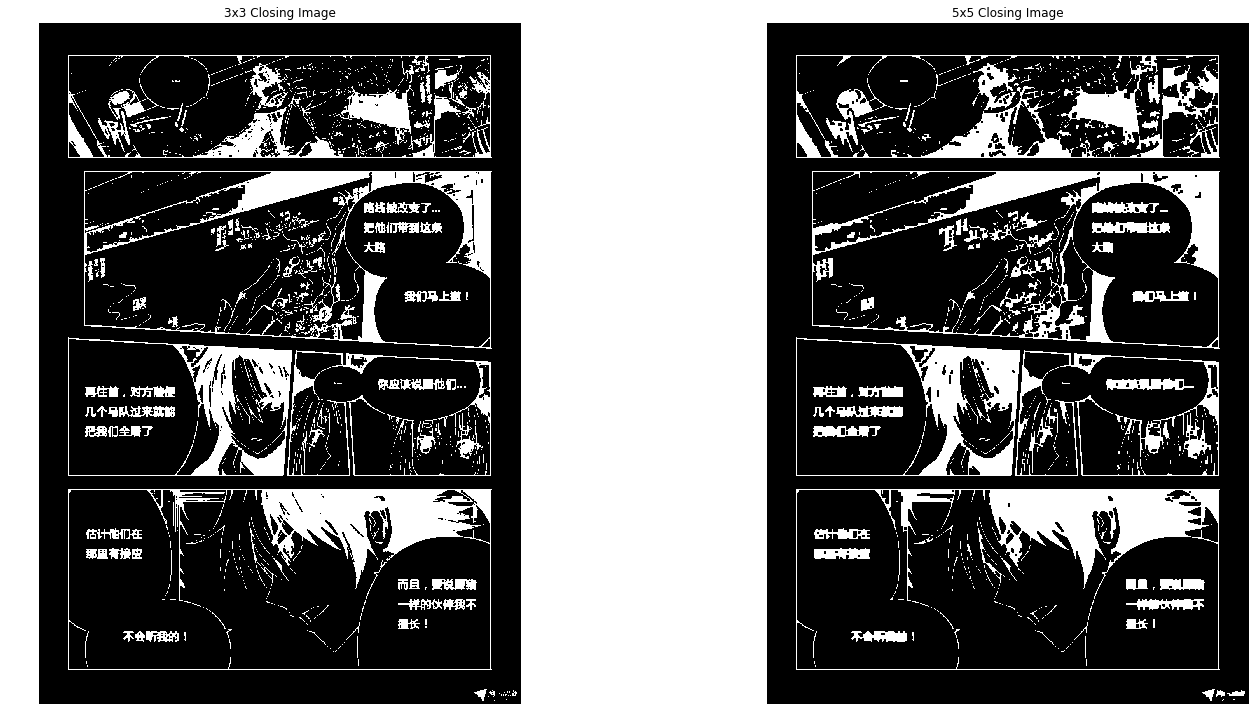

In [51]:
# 设置matplotlib中图像的大小
fig, axs = plt.subplots(1, 2, figsize=(20, 10), constrained_layout=True)
 
axs[0].imshow(erosion_3, cmap='gray')
axs[0].set_title('3x3 Closing Image')
axs[0].axis('off')  # 不显示坐标轴
 
# 显示kernel_5
axs[1].imshow(erosion_5, cmap='gray')
axs[1].set_title('5x5 Closing Image')
axs[1].axis('off')  # 不显示坐标轴

plt.show()

Closing操作可以有效去除白色对话框中的黑色字体，从而更好地识别白色对话框。

## Morphological Gradient
用于描绘前景物体的轮廓。仅将kernel里即出现了0又出现了1的部分设置为1（白色）。

In [52]:
# Gradient
erosion_3 = cv2.morphologyEx(binary, cv2.MORPH_GRADIENT, kernel_3)

erosion_5 = cv2.morphologyEx(binary, cv2.MORPH_GRADIENT, kernel_5)

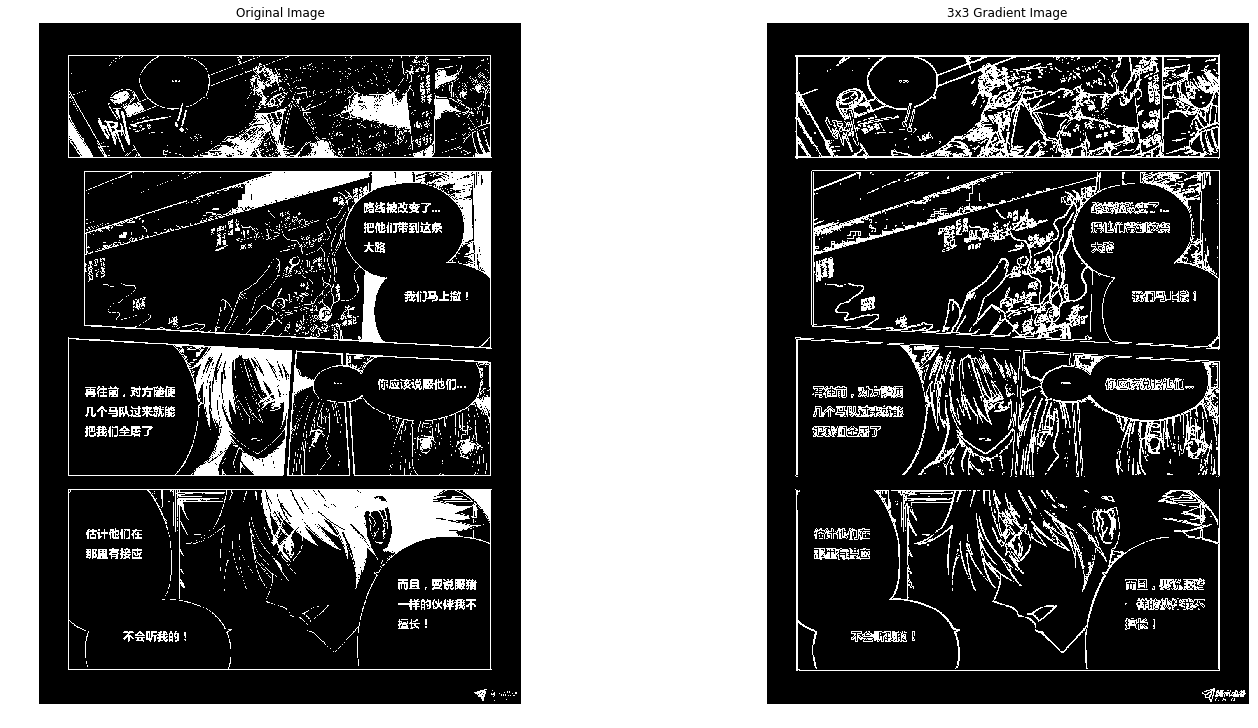

In [53]:
# 设置matplotlib中图像的大小
fig, axs = plt.subplots(1, 2, figsize=(20, 10), constrained_layout=True)
 
# 显示原图
axs[0].imshow(binary, cmap='gray')
axs[0].set_title('Original Image')
axs[0].axis('off')  # 不显示坐标轴
 
# 显示kernel_3
axs[1].imshow(erosion_3, cmap='gray')
axs[1].set_title('3x3 Gradient Image')
axs[1].axis('off')  # 不显示坐标轴

plt.show()

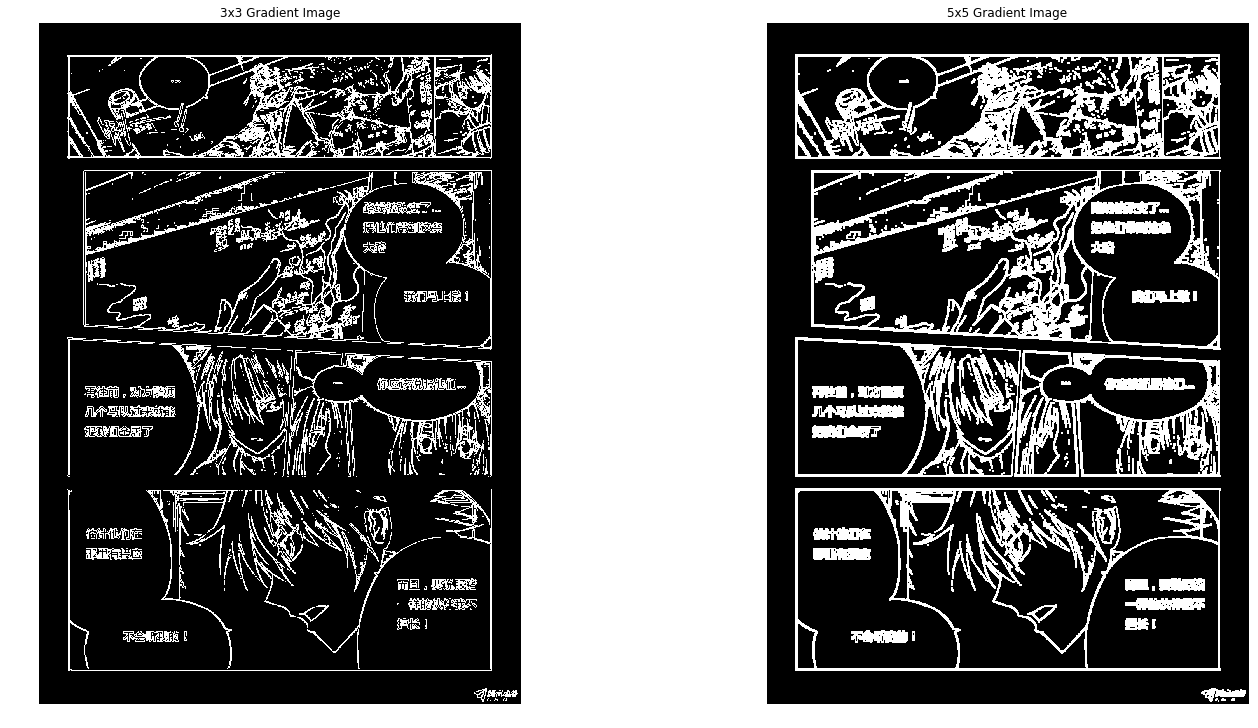

In [54]:
# 设置matplotlib中图像的大小
fig, axs = plt.subplots(1, 2, figsize=(20, 10), constrained_layout=True)
 
axs[0].imshow(erosion_3, cmap='gray')
axs[0].set_title('3x3 Gradient Image')
axs[0].axis('off')  # 不显示坐标轴
 
# 显示kernel_5
axs[1].imshow(erosion_5, cmap='gray')
axs[1].set_title('5x5 Gradient Image')
axs[1].axis('off')  # 不显示坐标轴

plt.show()

# panels分割

In [199]:
# 读取图像并转换为灰度图像
image = cv2.imread('./dataset/001-12.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
img_h,img_w = gray.shape

# 显示测试图像
scale = 0.4
cv2.namedWindow('image', cv2.WINDOW_NORMAL) 
cv2.resizeWindow('image', width=int(img_w*scale), height=int(img_h*scale))
cv2.imshow('image',gray)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [200]:
# 应用阈值处理得到二值图像
# 检测对象为白色，背景为黑色
_, binary = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY_INV)

In [201]:
# scale = 0.4
# cv2.namedWindow('filtered_image', cv2.WINDOW_NORMAL) 
# cv2.resizeWindow('filtered_image', width=int(img_w*scale), height=int(img_w*scale))
# cv2.imshow('filtered_image',binary)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [202]:
# 形态学转换
kernel = np.ones((5,5), np.uint8)
closing = cv2.morphologyEx(binary, cv2.MORPH_CLOSE, kernel)
gradient = cv2.morphologyEx(closing, cv2.MORPH_GRADIENT, kernel)

In [203]:
scale = 0.4
cv2.namedWindow('morphological image', cv2.WINDOW_NORMAL) 
cv2.resizeWindow('morphological image', width=int(img_w*scale), height=int(img_h*scale))
cv2.imshow('morphological image',gradient)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [204]:
binary = gradient

In [205]:
# 查找所有轮廓，并建立等级关系
_, contours, hierarchy = cv2.findContours(binary, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

In [206]:
# 绘制轮廓
image_contours = cv2.drawContours(image.copy(), contours, -1, (0, 255, 0), 2)

In [207]:
# 显示结果
cv2.namedWindow('Contours', cv2.WINDOW_NORMAL) 
cv2.resizeWindow('Contours', width=int(img_w*scale), height=int(img_h*scale))
cv2.imshow('Contours', image_contours)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [208]:
# 获取轮廓的个数
print(len(contours))

1102


In [209]:
# reshape hierarchy
hierarchy = hierarchy.reshape(-1, 4)
print(hierarchy.shape)

(1102, 4)


In [210]:
# 查找所有的最外层轮廓
parent_contour_index = -1

# 遍历所有轮廓，找到最外层轮廓
top_contours = []
for i, contour in enumerate(contours):
    # 检查轮廓的父轮廓是否是我们要找的那个
    if hierarchy[i][3] == parent_contour_index:
        x, y, w, h = cv2.boundingRect(contour)
        top_contours.append(contour)

In [211]:
print(len(top_contours))

13


In [212]:
# 绘制所有最外层轮廓
# contour_img = image.copy()
# for contour in top_contours:
#     cv2.drawContours(contour_img, [contour], -1, (0, 255, 0), 2)

In [213]:
# 显示图像
# cv2.namedWindow('Top Contours', cv2.WINDOW_NORMAL) 
# cv2.resizeWindow('Top Contours', width=int(img_w*scale), height=int(img_h*scale))
# cv2.imshow('Top Contours', contour_img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [214]:
rects = [] # 存储轮廓最小边框坐标
ratio = 1/10 # 定义panels长宽占比
for contour in top_contours:
    x, y, w, h = cv2.boundingRect(contour)
    # 判断是否为panel
    if (w < img_w*ratio) or (h < img_h*ratio):
        pass
    else:
        rect = np.array([x, y, w, h])
        rects.append(rect)

In [215]:
print(len(rects))

7


In [216]:
panel_img = image.copy()
for i in range(len(rects)):
    x, y, w, h = rects[i]
    # 在图像上绘制矩形
    cv2.rectangle(panel_img, (x, y), (x + w, y + h), (0,0,255), 2)

In [217]:
# 显示图像
cv2.namedWindow('Panels', cv2.WINDOW_NORMAL) 
cv2.resizeWindow('Panels', width=int(img_w*scale), height=int(img_h*scale))
cv2.imshow('Panels', panel_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [218]:
cv2.imwrite('./output/problem.jpg', panel_img)

True